# Feature Differences

Instructions:

i) Folder of test input images and test input labelled images should be in the same folder with this code file and folder name should be 'val' and 'val_labels" respectively but you can change the name in the data loading section.

Run the codes sequentially and you will get the ouput

Note:
i) If you are training for kvasir seg lood weights = chal1.pth 
ii)



In [1]:
size = 400

In [2]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
from torchvision import transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import cv2 

In [3]:
# Convert the output labels to pixel-wise classes

def c2g(cn):
    cn1 = np.reshape(cn, (1, 1, 3));
    cn = cv2.cvtColor(cn1, cv2.COLOR_BGR2GRAY);
    del cn1
    return cn;

colors = [];
colors.append(c2g(np.array([0, 0, 0], dtype = 'uint8')));
colors.append(c2g(np.array([255, 255, 255], dtype = 'uint8')));

# colors.append(c2g(np.array([0, 0, 0], dtype = 'uint8')));

import torch
from PIL import Image
from torch import Tensor
from torchvision.transforms import transforms
import torchvision.transforms.functional as F

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import numbers
from abc import abstractmethod
from typing import Tuple
import random


# 

def class_pixel(label_img):
    # print(label_img.shape)
    
    aa,bb = label_img.shape

    
    class_pix = np.ones([aa, bb, 1], dtype = int);
    for index, c in enumerate(colors):
        
        class_pix[label_img == c] = index; 
    # print(class_pix)
    

    return class_pix
def label_img_list(img_list):
    images = [];
    for image in img_list:
        images.append(class_pixel(image));
    del img_list
    return images;


# Data Loading

In [4]:
# FOR VALIDATION

import os

# To load images

def loads_img(folder):
    c = 0;
    images = [];
    filenam =[];
    for filename in os.listdir(folder): # List all the filenames in the folde
        print('nwname ',filename)
        c = c + 1;
        print(c);
        img = cv2.imread(os.path.join(folder, filename)); 
        img = cv2.resize(img, (size,size))
        images.append(img);
        del img

    return images

# To load labeled gray-scaled images

def loads_label_img(folder):
    images = [];
    c = 0;
    for filename in os.listdir(folder): # List all the filenames in the folder
        c = c + 1;
        print(c)
        img = cv2.imread(os.path.join(folder, filename));
       
        images.append(img);
        del img
        


    return images

def matplotlib_imshow(display_list):
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.imshow(display_list[i])
        plt.axis('off')
    plt.show()

transform_img = transforms.Compose([ 
    transforms.ToTensor()]);
    

transform_img_label = transforms.Compose([
    transforms.ToTensor()
]);

from torch.utils.data import Dataset, DataLoader


    
class testsett(data.Dataset):
    def __init__(self, transform = None, root_test = None, root_test_label = None, transform_label = None):
        self.test_img= loads_img(root_test);
        self.transform = transform;
        self.test_label_img = loads_label_img(root_test_label);
        
    def __len__(self):
        return len(self.test_img);
    
    def __getitem__(self, index):
        img = self.transform(self.test_img[index]);
        label = self.test_label_img[index];
#         name = self.name[index]
        img2 = self.test_img[index];

        return img, label,img2;


testdatasets = testsett(transform_img, 'val', 'val_labels', transform_img_label);

val_loader = data.DataLoader(testdatasets, batch_size = 1, shuffle=False,  num_workers=0);

nwname  ckcu8ty6z00003b5yzfaezbs5.jpg
1
nwname  ckcu8v7pr00013b5ymfi2z7uf.jpg
2
nwname  ckcu8w7vy00023b5y3vt2wczx.jpg
3
nwname  ckcu8xad600033b5yc78xfyjx.jpg
4
nwname  ckcu99qx200043b5yd2c5g84t.jpg
5
nwname  ckcu9ejjf00053b5y4mf7bilw.jpg
6
nwname  ckcu9ij2e00063b5yrrbb3f2o.jpg
7
nwname  ckcu9j9vo00073b5y3m92mu6n.jpg
8
nwname  ckcu9jucf00083b5ytpqoue72.jpg
9
nwname  ckcu9ksoq00093b5ylw5wwfr2.jpg
10
nwname  ckcu9lvft000a3b5yb79pnr64.jpg
11
nwname  ckcu9mtrc000b3b5y826amhgq.jpg
12
nwname  ckcu9newl000c3b5ynkam0whb.jpg
13
nwname  ckcu9qend000d3b5y0mgn5fhw.jpg
14
nwname  ckcu9r72l000e3b5yerhwmjut.jpg
15
nwname  ckcu9ru1s000f3b5yi4748k4m.jpg
16
nwname  ckcu9sikm000g3b5y1yd89b1g.jpg
17
nwname  ckcu9t8au000h3b5y7l82d9jh.jpg
18
nwname  ckcu9tscz000i3b5yqgmkln7u.jpg
19
nwname  ckcu9vda7000k3b5yh7a2gh5v.jpg
20
nwname  ckcu9w0ls000l3b5yfqcnpqny.jpg
21
nwname  ckcu9xaug000n3b5y480n145d.jpg
22
nwname  ckcu9yqhb000o3b5y5o6idona.jpg
23
nwname  ckcu9zqev000p3b5ylwdnm6e8.jpg
24
nwname  ckcua0dkl000q3b5y

# Model 

In [5]:
import torch
from torch import nn
from torch.nn import functional as F

from numpy.linalg import svd
from numpy.random import normal
from math import sqrt
import torchvision.models as models

import torch
import torch.nn as nn
import torch.nn.functional as F
from network.utils import IntermediateLayerGetter
from network._deeplab import DeepLabHead, DeepLabHeadV3Plus, DeepLabV3
from network.backbone import resnet
from network.backbone import mobilenetv2

def _segm_resnet(name, backbone_name, num_classes, output_stride, pretrained_backbone):

    if output_stride==8:
        replace_stride_with_dilation=[False, True, True]
        aspp_dilate = [12, 24, 36]
    else:
        replace_stride_with_dilation=[False, False, True]
        aspp_dilate = [6, 12, 18]

    backbone = resnet.__dict__[backbone_name](
        pretrained=pretrained_backbone,
        replace_stride_with_dilation=replace_stride_with_dilation)
    
    inplanes = 2048
    low_level_planes = 256

    if name=='deeplabv3plus':
        return_layers = {'layer4': 'out', 'layer1': 'low_level'}
        classifier = DeepLabHeadV3Plus(inplanes, low_level_planes, num_classes, aspp_dilate)
    elif name=='deeplabv3':
        return_layers = {'layer4': 'out'}
        classifier = DeepLabHead(inplanes , num_classes, aspp_dilate)
    backbone = IntermediateLayerGetter(backbone, return_layers=return_layers)

    model = DeepLabV3(backbone, classifier)
    return model

def _segm_mobilenet(name, backbone_name, num_classes, output_stride, pretrained_backbone):
    if output_stride==8:
        aspp_dilate = [12, 24, 36]
    else:
        aspp_dilate = [6, 12, 18]

    backbone = mobilenetv2.mobilenet_v2(pretrained=pretrained_backbone, output_stride=output_stride)
    
    # rename layers
    backbone.low_level_features = backbone.features[0:4]
    backbone.high_level_features = backbone.features[4:-1]
    backbone.features = None
    backbone.classifier = None

    inplanes = 320
    low_level_planes = 24
    
    if name=='deeplabv3plus':
        return_layers = {'high_level_features': 'out', 'low_level_features': 'low_level'}
        classifier = DeepLabHeadV3Plus(inplanes, low_level_planes, num_classes, aspp_dilate)
    elif name=='deeplabv3':
        return_layers = {'high_level_features': 'out'}
        classifier = DeepLabHead(inplanes , num_classes, aspp_dilate)
    backbone = IntermediateLayerGetter(backbone, return_layers=return_layers)

    model = DeepLabV3(backbone, classifier)
    return model

def _load_model(arch_type, backbone, num_classes, output_stride, pretrained_backbone):

    if backbone=='mobilenetv2':
        model = _segm_mobilenet(arch_type, backbone, num_classes, output_stride=output_stride, pretrained_backbone=pretrained_backbone)
    elif backbone.startswith('resnet'):
        model = _segm_resnet(arch_type, backbone, num_classes, output_stride=output_stride, pretrained_backbone=pretrained_backbone)
    else:
        raise NotImplementedError
    return model


# Deeplab v3

def deeplabv3_resnet50(num_classes=21, output_stride=8, pretrained_backbone=True):
    """Constructs a DeepLabV3 model with a ResNet-50 backbone.
    Args:
        num_classes (int): number of classes.
        output_stride (int): output stride for deeplab.
        pretrained_backbone (bool): If True, use the pretrained backbone.
    """
    return _load_model('deeplabv3', 'resnet50', num_classes, output_stride=output_stride, pretrained_backbone=pretrained_backbone)

def deeplabv3_resnet101(num_classes=21, output_stride=8, pretrained_backbone=True):
    """Constructs a DeepLabV3 model with a ResNet-101 backbone.
    Args:
        num_classes (int): number of classes.
        output_stride (int): output stride for deeplab.
        pretrained_backbone (bool): If True, use the pretrained backbone.
    """
    return _load_model('deeplabv3', 'resnet101', num_classes, output_stride=output_stride, pretrained_backbone=pretrained_backbone)

def deeplabv3_mobilenet(num_classes=21, output_stride=8, pretrained_backbone=True, **kwargs):
    """Constructs a DeepLabV3 model with a MobileNetv2 backbone.
    Args:
        num_classes (int): number of classes.
        output_stride (int): output stride for deeplab.
        pretrained_backbone (bool): If True, use the pretrained backbone.
    """
    return _load_model('deeplabv3', 'mobilenetv2', num_classes, output_stride=output_stride, pretrained_backbone=pretrained_backbone)


# Deeplab v3+

def deeplabv3plus_resnet50(num_classes=23, output_stride=2, pretrained_backbone=True):
    """Constructs a DeepLabV3 model with a ResNet-50 backbone.
    Args:
        num_classes (int): number of classes.
        output_stride (int): output stride for deeplab.
        pretrained_backbone (bool): If True, use the pretrained backbone.
    """
    return _load_model('deeplabv3plus', 'resnet50', num_classes, output_stride=output_stride, pretrained_backbone=pretrained_backbone)


def deeplabv3plus_resnet101(num_classes=21, output_stride=8, pretrained_backbone=True):
    """Constructs a DeepLabV3+ model with a ResNet-101 backbone.
    Args:
        num_classes (int): number of classes.
        output_stride (int): output stride for deeplab.
        pretrained_backbone (bool): If True, use the pretrained backbone.
    """
    return _load_model('deeplabv3plus', 'resnet101', num_classes, output_stride=output_stride, pretrained_backbone=pretrained_backbone)


def deeplabv3plus_mobilenet(num_classes=21, output_stride=8, pretrained_backbone=True):
    """Constructs a DeepLabV3+ model with a MobileNetv2 backbone.
    Args:
        num_classes (int): number of classes.
        output_stride (int): output stride for deeplab.
        pretrained_backbone (bool): If True, use the pretrained backbone.
    """
    return _load_model('deeplabv3plus', 'mobilenetv2', num_classes, output_stride=output_stride, pretrained_backbone=pretrained_backbone)



In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu");
print(device)
UNET = deeplabv3plus_resnet101(num_classes=2, output_stride=2, pretrained_backbone=True)
UNET.to(device);

# weightsInit(UNET)
PATH = 'weights/chal2.pth';
UNET.load_state_dict(torch.load(PATH))
# !zip -r /content/file.zip /content/test_input_data

cuda:0


<All keys matched successfully>

# Utils

In [7]:
colors = [];
colors.append(np.array([0, 0, 0], dtype = 'uint8'));
colors.append(np.array([255, 255, 255], dtype = 'uint8'));

ClassesColors = {
    (0,0,0): 0 ,
     (255,255,255): 1
            
    }

import numpy as np

color_mapping = {
     0 : [0,0,0], 
     1 : [255,255,255]
}
    

def visualize_prediction(prediction):
    color_image = np.zeros((prediction.shape[0], prediction.shape[1], 3))
    for color_id in color_mapping.keys():
        color_image[prediction == color_id] = color_mapping[color_id]
    return color_image.astype(np.uint8)


def corr(x): # To get proper correspondence between the outputs and the labels
    x = x.cpu();
    x = x.detach().numpy(); # Detach() was used as one can't convert a pytorch tensor to a numpy array if
    # required_grad is set True for that variable
    x = x.argmax(axis = 1);
    return x;

import numpy as np

color_mapping = {
     0 : [0,0,0], 
     1 : [255,255,255]
}


def class_pixel(label_img):
    # print(label_img.shape)
    
    aa,bb = label_img.shape
    
    class_pix = np.ones([aa, bb, 1], dtype = int);
    for index, c in enumerate(colors):
        if index==0:
          class_pix[label_img <=122] = index; 
        else:
          class_pix[label_img >=123] = index; 
    return class_pix

import numpy as np
np.seterr(divide='ignore', invalid='ignore')
__all__ = ['SegmentationMetric']

"""
confusionMetric  # 注意：此处横着代表预测值，竖着代表真实值，与之前介绍的相反
P\L     P    N
P      TP    FP
N      FN    TN
sum(axis=0) TP+FN
sum(axis=1) TP+FP
np.diag().sum() TP+TN
"""
class SegmentationMetric(object):
    def __init__(self, numClass):
        self.numClass = numClass
        self.confusionMatrix = np.zeros((self.numClass,)*2)

    def pixelAccuracy(self):
        # return all class overall pixel accuracy
        #  PA = acc = (TP + TN) / (TP + TN + FP + FN)
        acc = np.diag(self.confusionMatrix).sum() /  self.confusionMatrix.sum()
        return acc

    def meanPixelAccuracy(self):
        # return each category pixel accuracy(A more accurate way to call it precision)
        # acc = TP / (TP + FP)
        Cpa = np.diag(self.confusionMatrix) / self.confusionMatrix.sum(axis=1)
        Mpa = np.nanmean(Cpa)  
        return Mpa, Cpa


    def meanIntersectionOverUnion(self):
        # Intersection = TP ;Union = TP + FP + FN
        # Ciou = TP / (TP + FP + FN)
        intersection = np.diag(self.confusionMatrix)
        union = np.sum(self.confusionMatrix, axis=1) + np.sum(self.confusionMatrix, axis=0) - np.diag(self.confusionMatrix) # axis = 1表示混淆矩阵行的值，返回列表； axis = 0表示取混淆矩阵列的值，返回列表

        Ciou = (intersection / np.maximum(1.0, union))   
        mIoU = np.nanmean(Ciou)  
        return mIoU, Ciou

    def Frequency_Weighted_Intersection_over_Union(self):
        # FWIOU =     [(TP+FN)/(TP+FP+TN+FN)] *[TP / (TP + FP + FN)]
        freq = np.sum(self.confusionMatrix, axis=1) / np.sum(self.confusionMatrix)
        iu = np.diag(self.confusionMatrix) / (
                np.sum(self.confusionMatrix, axis=1) + np.sum(self.confusionMatrix, axis=0) -
                np.diag(self.confusionMatrix))
        FWIoU = (freq[freq > 0] * iu[freq > 0]).sum()
        return FWIoU

    def precision(self):
        # precision = TP / (TP+FP)
        precision = np.diag(self.confusionMatrix) / np.sum(self.confusionMatrix, axis=1)
        return precision

    def recall(self):
        # recall = TP / (TP+FN)
        recall = np.diag(self.confusionMatrix) / np.sum(self.confusionMatrix, axis=0)
        return recall

    def genConfusionMatrix(self, imgPredict, imgLabel):
        # remove classes from unlabeled pixels in gt image and predict
        mask = (imgLabel >= 0) & (imgLabel < self.numClass)
        label = self.numClass * imgLabel[mask].astype('int') + imgPredict[mask]
        count = np.bincount(label, minlength=self.numClass**2)
        confusionMatrix = count.reshape(self.numClass, self.numClass)
        return confusionMatrix

    def addBatch(self, imgPredict, imgLabel):
        assert imgPredict.shape == imgLabel.shape
        self.confusionMatrix += self.genConfusionMatrix(imgPredict, imgLabel)

    def reset(self):
        self.confusionMatrix = np.zeros((self.numClass, self.numClass))

if __name__ == '__main__':
    imgPredict = np.array([0, 0, 0, 0])
    imgLabel = np.array([0, 0, 0, 0]) 
    metric = SegmentationMetric(2) 
    metric.addBatch(imgPredict, imgLabel)
    pa = metric.pixelAccuracy()
    cpa = metric.recall()[0]
    pre = metric.precision()[0]
    mpa = metric.meanPixelAccuracy()
    mIoU, per = metric.meanIntersectionOverUnion()

EPS = 1e-10
def nanmean(x):
    """Computes the arithmetic mean ignoring any NaNs."""
    return torch.mean(x[x == x])
def _fast_hist(true, pred, num_classes):
    mask = (true >= 0) & (true < num_classes)
    hist = torch.bincount(
        num_classes * true[mask] + pred[mask],
        minlength=num_classes ** 2,
    ).reshape(num_classes, num_classes).float()
    return hist
def dice_coefficient(hist):
    """Computes the Sørensen–Dice coefficient, a.k.a the F1 score.
    Args:
        hist: confusion matrix.
    Returns:
        avg_dice: the average per-class dice coefficient.
    """
    A_inter_B = torch.diag(hist)
    A = hist.sum(dim=1)
    B = hist.sum(dim=0)
    dice = (2 * A_inter_B) / (A + B + EPS)
    avg_dice = nanmean(dice)
    return avg_dice


def eval_metrics(true, pred, num_classes):
    """Computes various segmentation metrics on 2D feature maps.
    Args:
        true: a tensor of shape [B, H, W] or [B, 1, H, W].
        pred: a tensor of shape [B, H, W] or [B, 1, H, W].
        num_classes: the number of classes to segment. This number
            should be less than the ID of the ignored class.
    Returns:
        overall_acc: the overall pixel accuracy.
        avg_per_class_acc: the average per-class pixel accuracy.
        avg_jacc: the jaccard index.
        avg_dice: the dice coefficient.
    """
    hist = torch.zeros((num_classes, num_classes))
    for t, p in zip(true, pred):
        hist += _fast_hist(t.flatten(), p.flatten(), num_classes)
    
    avg_dice = dice_coefficient(hist)
    return avg_dice


def testss(img1,img2):
    sen = [];
    for i in range(400):
      for j in range(400):
        if img1[i][j]==0:
          sen.append(np.array(img2[i][j], dtype = 'uint8'));
    r=0
    b=0
    g=0
    length=len(sen)
    if length==0:
      return img2
    for i in range(length):
      r+=sen[i][0].item()
      b+=sen[i][1].item()
      g+=sen[i][2].item()
    
    r=r/length
    b=b/length
    g=g/length
    avg=[r,b,g]

    for i in range(400):
      for j in range(400):
        if img1[i][j]==1:
          img2[i][j]=avg
    print(avg)
    return img2

import os
import cv2
import skimage
from skimage.metrics import structural_similarity
import tensorflow as tf
import random 
color1_mapping = {
     0 : [254,143,111]
}
def visualize_prediction3(prediction,img):
    color_image =  np.ones([400, 400, 3], dtype = int);
    color_image=color_image*0
    for color_id in color1_mapping.keys():
        color_image[prediction !=img] = [1.,1.,1.]
    
    return color_image.astype(np.uint8)


# Feature Difference


   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
   10
   11
   12
   13
   14
   15
   16
   17
   18
   19
   20
   21
   22
   23
   24
   25
   26
   27
   28
   29
   30
   31
   32
   33
   34
   35
   36
   37
   38
   39
   40
   41
   42
   43
   44
   45
   46
   47
   48
   49
   50
   51
   52
   53
   54
   55
   56
   57
   58
   59
   60
   61
   62
   63
   64
   65
   66
   67
   68
   69
   70
   71
   72
   73
   74
   75
   76
   77
   78
   79
   80
   81
   82
   83
   84
   85
   86
   87
   88
   89


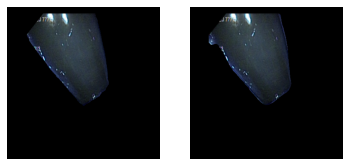

GT feature extraction    Model feature extraction


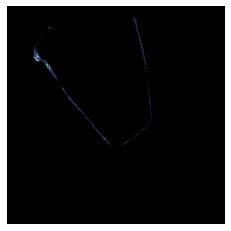

        differences
   


In [9]:
# """""""" VALIDATION """"""""""""""""""""""""""
import copy  
os.environ['KMP_DUPLICATE_LIB_OK']='True'
def matplotlib_imshow(display_list):
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.imshow(display_list[i])
        plt.axis('off')
    plt.show()

import matplotlib.pyplot as plt

# import numpy
CUDA_LAUNCH_BLOCKING=1
los=0
kb=0
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
transform_img = transforms.Compose([ 
    transforms.ToTensor()]);
kb=los
los=0
fs=0
p=0
pre=0
rec=0
di=0
with torch.no_grad():
  correct = 0;
  total = 0;
  UNET.eval()
  import cv2
  def _fast_hist(label_pred, label_true, n_class):
      mask = (label_true >= 0) & (label_true < n_class)
      hist = np.bincount(
          n_class * label_true[mask].astype(int) + label_pred[mask], minlength=n_class ** 2
      ).reshape(n_class, n_class)
      return hist


  def evaluate(predictions, gts, num_classes):
      hist = np.zeros((num_classes, num_classes))
      for lp, lt in zip(predictions, gts):
          hist += _fast_hist(lp.flatten(), lt.flatten(), num_classes)
      
      iu = np.diag(hist) / (hist.sum(axis=1) + hist.sum(axis=0) - np.diag(hist))
      mean_iu = np.nanmean(iu)
      
      return mean_iu

  for i, data in enumerate(val_loader):
      print('  ',i)
      inputs, labels,tes = data;
      inputs = inputs.to(device);

      outputs = UNET.forward(inputs);
      inputs=inputs.squeeze(0)
      inputs= np.array(inputs.cpu())
      inputs = inputs.reshape(size,size,3)
      outputs = corr(outputs);
      labels = labels.detach().numpy();
      outputs = outputs.reshape(1, size, size);
      correct=correct+1

      color_pred=labels[0]
      d1,a1,b1 =labels[0].shape
      
      color_pre=outputs
      
      dd,aa,bb = color_pre.shape
      d1,a1,b1 =labels[0].shape

      color_pre=np.array(color_pre).reshape(aa,bb)


      color_pre=visualize_prediction(color_pre)
      img = cv2.resize(color_pre, (a1,d1))
      inputs = cv2.resize(inputs, (a1,d1))
      inputs=inputs
      color_preds=copy.deepcopy(color_pred)
      if i==89:

        tes=tes.squeeze(0)

        tes=np.array(tes.cpu())
        import copy
#         tes=cv2.cvtColor(tes, cv2.COLOR_BGR2RGB);
        tes1=copy.deepcopy(tes)

        
      if i==89:
        outputs=outputs.reshape(400,400,1)
        ig4=outputs
        outputss=np.concatenate((ig4,ig4,ig4),axis=2)
        tes2=tes1*outputss
        color_pred = cv2.resize(color_pred, (400,400))
        imgx = cv2.cvtColor(color_pred, cv2.COLOR_BGR2GRAY);


        imgx = class_pixel(imgx)
        ig44=imgx
        outputsss=np.concatenate((ig44,ig44,ig44),axis=2)

        tes3=tes1*outputsss
        outputs=outputs.squeeze(2)
        imgx=imgx.squeeze(2)
        aeg=visualize_prediction3(outputs,imgx)
        tes4=tes1*aeg
        matplotlib_imshow([tes3,tes2])
        cv2.imwrite('result/'+'diff11'+'.jpg',tes3)
        cv2.imwrite('result/'+'diff12'+'.jpg',tes2)
        cv2.imwrite('result/'+'diff13'+'.jpg',tes4)
        print('GT feature extraction    Model feature extraction')
        matplotlib_imshow([tes4])
        
        print('        differences')
        print('   ')
